In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x and y ticks by default:

<Container object of 9 artists>

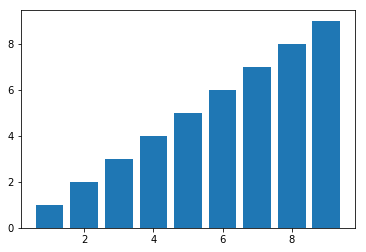

In [3]:
fig = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))

using plt.xticks and plt.yticks methods:

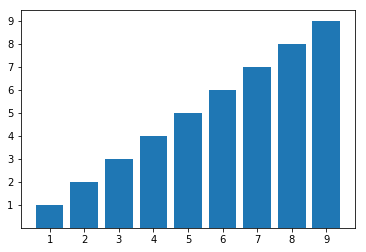

In [4]:
fig = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.xticks(list(range(1,10))) # <<< 
plt.yticks(list(range(1,10))) # <<<
plt.show()

@@@@@@@@@@@@@@@@

stacked bar chart

you need "bottom" parameter which is the sum of the previous

@@@@@@@@@@@@@@@@@@@@@@@

1. setting x labels
2. setting label rotation
3. setting label font

by the "set_xticks" and "set_xticklabels" methods of the axes obj

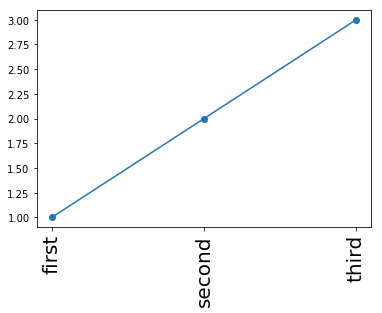

In [24]:
fig1 = plt.figure()
ax = plt.axes()  # <<<< ax obj
 
labels = ["first", "second", "third"] # <<< labels are stored in here

plt.plot(range(1,4), range(1,4), marker="o")

ax.set_xticks([1,2,3]) # <<<<< setting numbers of ticks
ax.set_xticklabels(labels, rotation="vertical", fontsize="20") # <<<< setting labels, rotation and font

plt.show()